Populating the interactive namespace from numpy and matplotlib


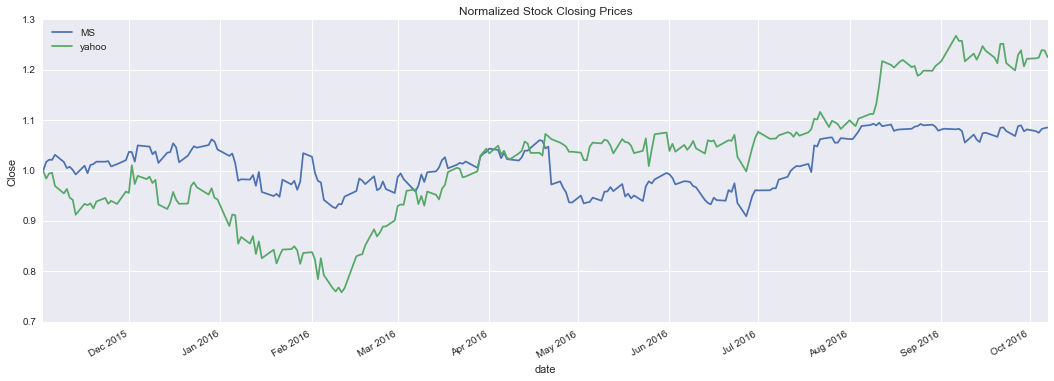

In [23]:
# Parsing and showing multiple stocks
# data downloaded from yahoo finance e.g. https://finance.yahoo.com/quote/YHOO/history?p=YHOO


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import datetime
%pylab inline

start_date = '2015-11-01'
end_date = '2016-11-01'

dates = pd.date_range(start_date,end_date)
datesDF = pd.DataFrame(index=dates)
# datesDF.head()

symbols = ['MS','yahoo']
df = datesDF




for s in symbols:
    tempDF = pd.read_csv("data/{}.csv".format(s),encoding="utf-8",index_col='Date',parse_dates = True,usecols=['Date','Close'])    
    tempDF = tempDF.rename(columns={'Close': s})

    df = df.join(tempDF)
# , 
df=df.dropna()
normalizedDF = df/df.ix[0,:] # normalizing values across different stocs 
ax = normalizedDF.plot(title="Normalized Stock Closing Prices", figsize=(18,6))
# ax.width('500px')
ax.set_xlabel('date')
ax.set_ylabel('Close')

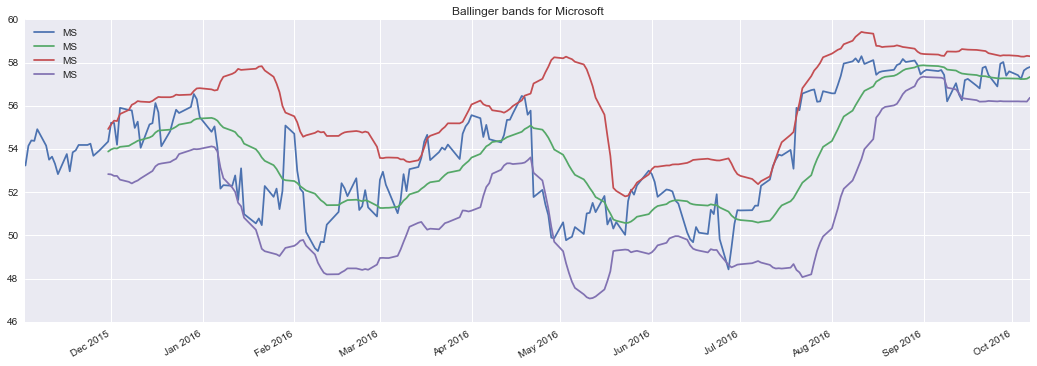

In [24]:
# Rolling mean, std & Ballinger bands

msDF = df[['MS']]
rolling_mean = msDF.rolling(window = 20, center=False).mean()
rolling_std = msDF.rolling(window = 20, center=False).std()
upper_band = rolling_mean+2*rolling_std
lower_band = rolling_mean-2*rolling_std

#DataFrame.rolling(window=20,center=False).mean()
plt1 = msDF.plot(title='Ballinger bands for Microsoft',legend='MS', figsize=(18,6))
rolling_mean.plot(legend='mean', ax=plt1)
upper_band.plot(legend='upper',ax=plt1)
lower_band.plot(legend='lower',ax=plt1)
# labels don't work, alternative: plt1.legend(['Popularity', 'RateMedian', 'FirstPpl', 'FirstRM'])

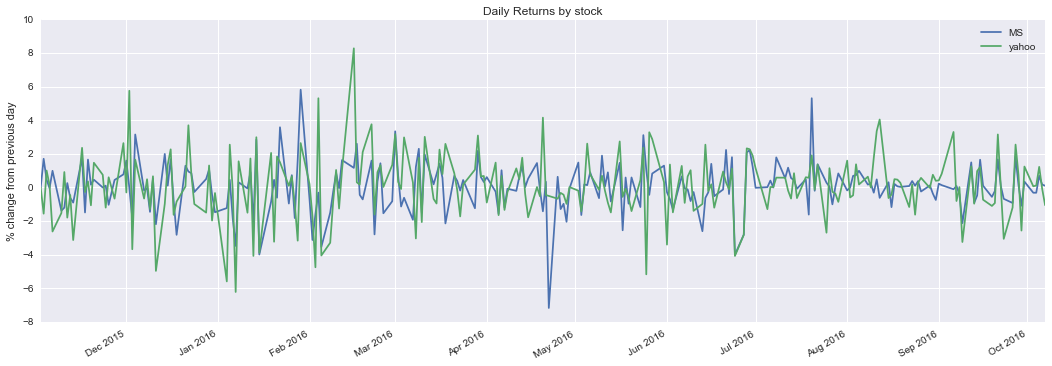

In [25]:
#Daily returns

dailyReturns = 100*(df/df.shift(1) - 1)
dailyReturns.ix[0,]=0.0

dplt = dailyReturns.plot(title="Daily Returns by stock", figsize=(18,6))
dplt.set_ylabel('% change from previous day')



Kurtosis:
MS       3.792397
yahoo    1.865550
dtype: float64


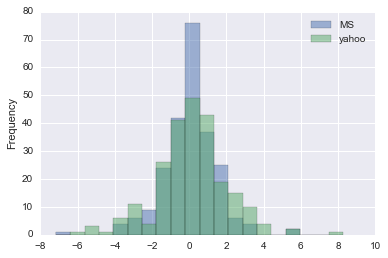

In [35]:
#histogram for daily returns 
# dailyReturns[['MS']].hist(bins=20)
# dailyReturns[['yahoo']].hist(bins=20)

ms_mean = dailyReturns[['MS']].mean()
ms_std = dailyReturns[['MS']].std()

print "Kurtosis:\n",dailyReturns.kurtosis()

plt.figure()
dailyReturns.plot(kind='hist', alpha=0.5,bins=20)
## can't get this shit working :(
# plt.axvline(ms_mean, color='b', linestyle='dashed', linewidth=2)
# plt.axvline(ms_std, color='b', linestyle='dashed', linewidth=2)
# plt.axvline(-ms_std, color='b', linestyle='dashed', linewidth=2)



This shows that yahoo stocks is slightly more volatile.

In probability theory and statistics, **kurtosis** (from Greek meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution. 

The kurtosis of any univariate normal distribution is 3. It is common to compare the kurtosis of a distribution to this value. Distributions with kurtosis less than 3 are said to be platykurtic, although this does not imply the distribution is "flat-topped" as sometimes reported. Rather, it means the distribution produces fewer and less extreme outliers than does the normal distribution. An example of a platykurtic distribution is the uniform distribution, which does not produce outliers. Distributions with kurtosis greater than 3 are said to be leptokurtic. An example of a leptokurtic distribution is the Laplace distribution, which has tails that asymptotically approach zero more slowly than a Gaussian, and therefore produces more outliers than the normal distribution. It is also common practice to use an adjusted version of Pearson's kurtosis, the excess kurtosis, which is the kurtosis minus 3, to provide the comparison to the normal distribution. Some authors use "kurtosis" by itself to refer to the excess kurtosis. For the reason of clarity and generality, however, this article follows the non-excess convention and explicitly indicates where excess kurtosis is meant.

So in our case, Microsoft is more likely to incur surprisingly higher returns/losses. 


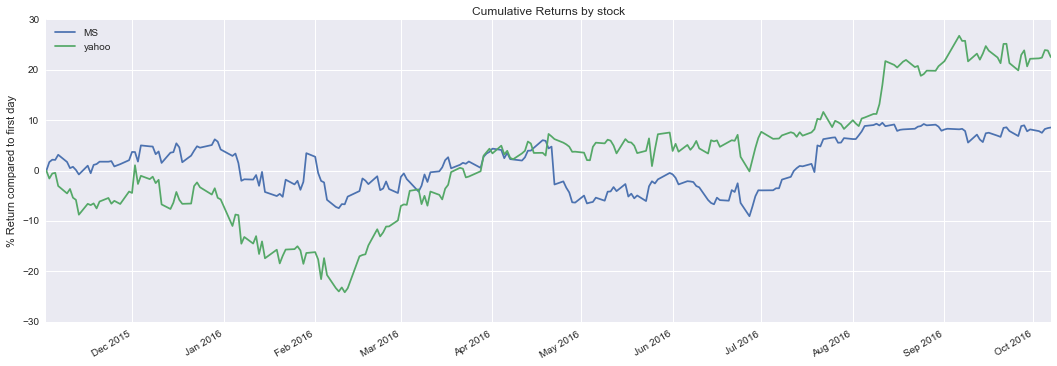

In [42]:
#Cumulative Returns 
cumulativeReturns = 100*(df/df.ix[0] - 1)


cplt = cumulativeReturns.plot(title="Cumulative Returns by stock", figsize=(18,6))
cplt.set_ylabel('% Return compared to first day')

This is the returns you could expect compared to the first data point, that is, if you had invested in yahoo in Nov 2015, you would get a +20% return on your investment. 


beta: 0.596932094366, alpha: 0.077859459062
correlation between returns: 
             MS     yahoo
MS     1.000000  0.446737
yahoo  0.446737  1.000000


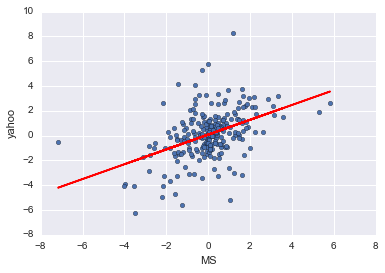

In [45]:
## How are returns between MS and yahoo stocks related?
import numpy as np 

dailyReturns.plot(kind='scatter', x="MS", y="yahoo" )

beta, alpha = np.polyfit(dailyReturns['MS'],dailyReturns['yahoo'],1)
plt.plot(dailyReturns['MS'],dailyReturns['MS']*beta+alpha,'-',color='r')

print "beta: {0}, alpha: {1}".format(beta,alpha)
print "correlation between returns: \n", dailyReturns.corr(method="pearson")

For every step increase in daily retuns of microsoft, beta tells us that yahoo's return will increase by almost half (beta). The alpha value (0.078) tells us that yahoo's stock is performing on average slightly better every day. 

And we can see that there's a noticeable correlation between returns (0.44).
